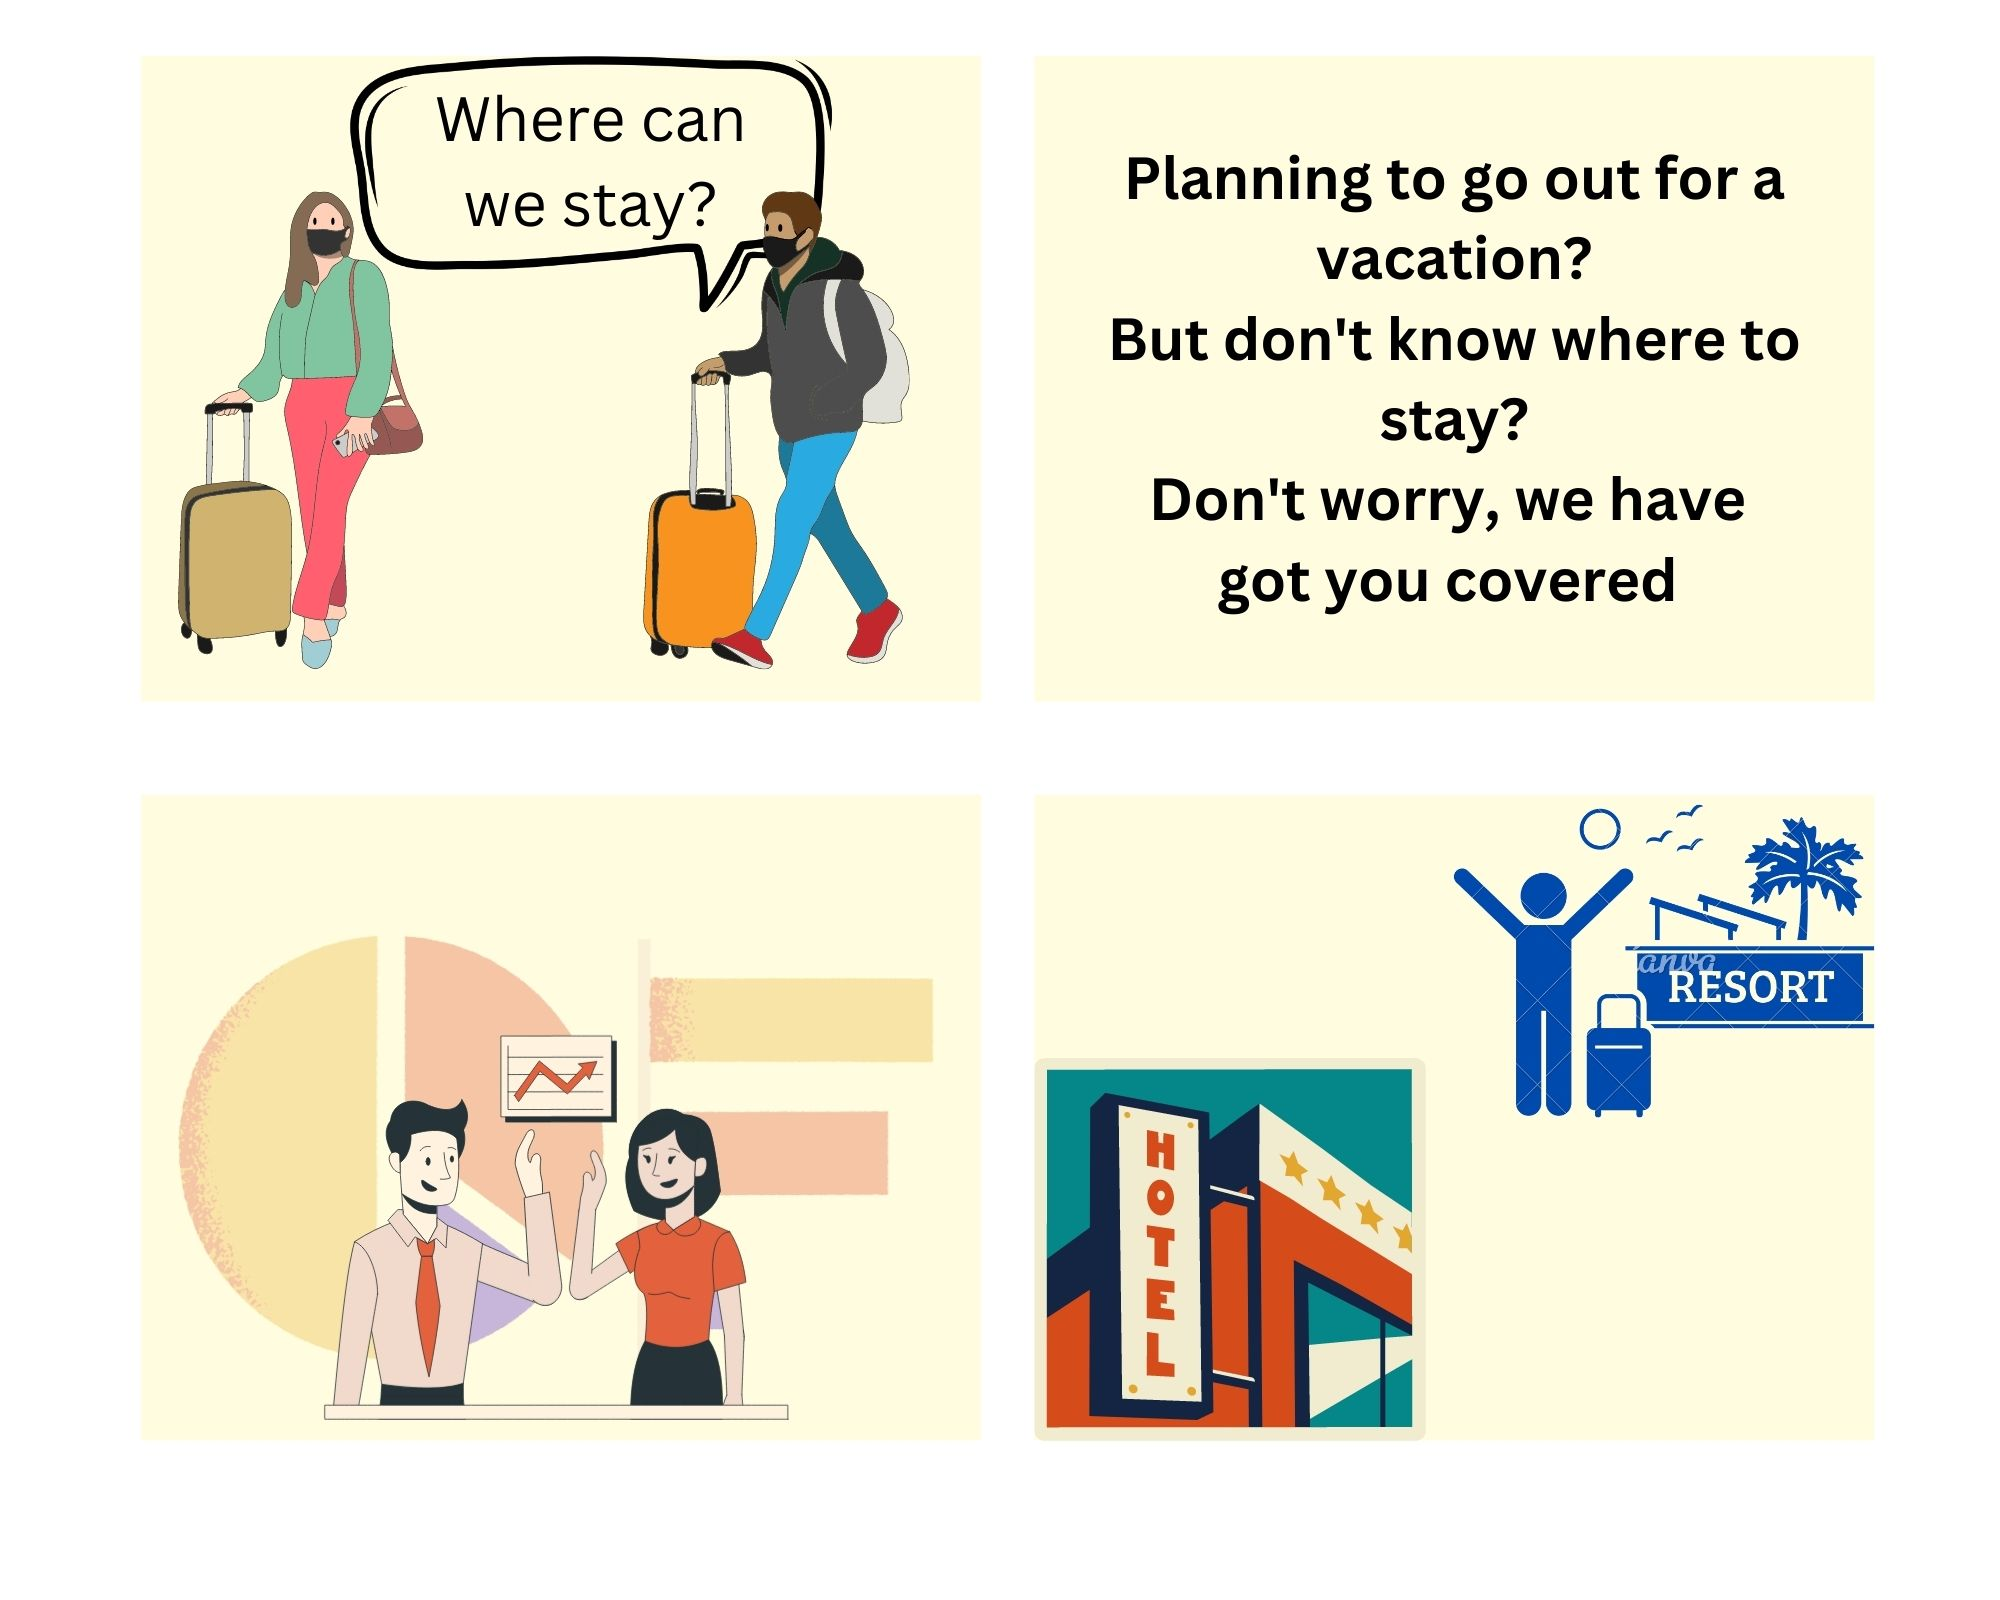
## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### 0. Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Reading and Exploring Dataset

##### 1.1 Reading csv file as a DataFrame using Pandas

In [ ]:
df_hotel = pd.read_csv("/content/Hotel Bookings.csv")
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


##### 1.2 Number of Data Points

In [ ]:
df_hotel.shape

(119390, 32)

##### 1.3 Concise Summary of Data Frame

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dataset Description:
- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record. 
- meal: Type of meal chosen 
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed 
- reservation_status_date: Date of making reservation status.

##### 1.4 Checking Number of Missing Values (As we can see in summary only 4 columns have missing values)

In [ ]:
df_hotel.isnull().sum().sort_values(ascending=False)[:4]

company     112593
agent        16340
country        488
children         4
dtype: int64

##### 1.5 Handling missing values

In [ ]:
# 1.6.1 company has numerical values, so filling missing values with 0
df_hotel['company'].fillna(0, inplace=True)

# 1.6.2 agent has numerical values, so filling missing values with 0
df_hotel['agent'].fillna(0, inplace=True)

# 1.6.3 country has string values, so filling missing values as 'unknown'
df_hotel['country'].fillna('unknown', inplace=True)

# 1.6.4 children has numerical values, so filling missing values as 0
df_hotel['children'].fillna(0, inplace=True)

## Verifying again missing values
df_hotel.isnull().sum().sort_values(ascending=False)[:4]

hotel                        0
is_canceled                  0
reservation_status           0
total_of_special_requests    0
dtype: int64

##### 1.6 Checking and handling duplicate rows

In [ ]:
## Checking for Number of duplicate rows
duplicateRow = df_hotel[df_hotel.duplicated()].shape
print("No. of duplicate Entries",duplicateRow[0])

## Dropping duplicates
df_hotel.drop_duplicates(inplace=True)
duplicateRow = df_hotel[df_hotel.duplicated()].shape
print("No. of duplicate Entries after removing are", duplicateRow[0])

No. of duplicate Entries 31994
No. of duplicate Entries after removing are 0


##### 1.7 Checking if any bookings have no people(adults, children, babies) as we can simply ignore those entries

In [ ]:
## Checking for Entries with no people
noPeopleRow = df_hotel[df_hotel['adults'] + df_hotel['babies'] + df_hotel['children'] == 0].shape
print("No. of entries with no People", noPeopleRow[0])

## Removing those Entries
df_hotel.drop(df_hotel[df_hotel['adults'] + df_hotel['babies'] + df_hotel['children'] == 0].index,inplace=True)
noPeopleRow = df_hotel[df_hotel['adults'] + df_hotel['babies'] + df_hotel['children'] == 0].shape
print("No. of entries with no People after cleaning", noPeopleRow[0])

No. of entries with no People 166
No. of entries with no People after cleaning 0


##### 1.8 Descriptive Statistics of Numerical Columns of Data Frame

In [ ]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


1.9 Which are categorical columns and continuos columns in dataset




In [ ]:
# get all the categorical columns name
cat_cols = list(df_hotel.select_dtypes(include='object').columns)
print(f'Categorical columns: {cat_cols}')

# get all the continuous columns name
con_cols = list(df_hotel.select_dtypes(exclude='object').columns)
print(f'Continuous columns: {con_cols}')

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Continuous columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


### 2. Analysis

##### 2.1 Which Hotel has more bookings ?

Types of hotels ['Resort Hotel' 'City Hotel']


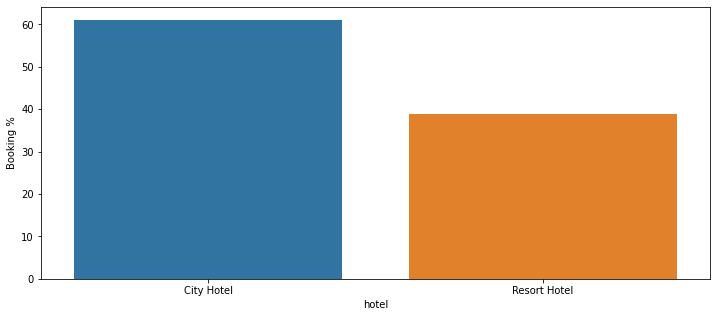

In [ ]:
print("Types of hotels", df_hotel['hotel'].unique())
#Plotting seaborn for counting booking in hotel
grouped_by_hotel = df_hotel.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df_hotel.shape[0])*100).reset_index().rename(columns = {0:'Booking %'}) #Calculating percentage
plt.figure(figsize = (12,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )

plt.show()


Here we can see that City hotel has more number of bookings


##### 2.2 Number of cancellation bookings

Total Number of Cancellation is 24009
Total Number of Resort Hotel Cancellation is 7974
Total Number of City Hotel Cancellation is 16035
Total Cancellation percentage is 27.523787687722113
Total Resort Hotel Cancellation percentage is 23.483331370008244
Total City Hotel Cancellation percentage is 30.099110260164437


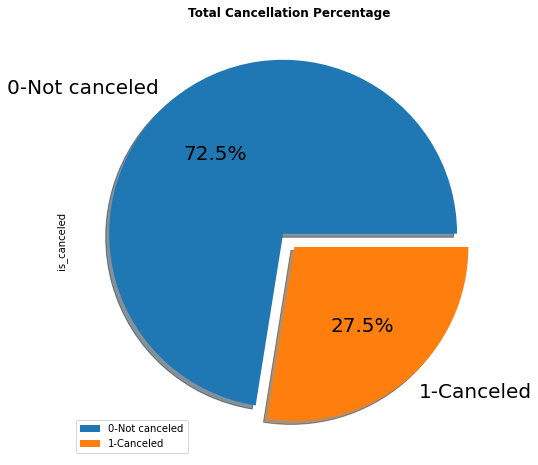

In [ ]:

total_cancelations = df_hotel["is_canceled"].sum()
resort_cancelations = df_hotel.loc[df_hotel["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cancelations = df_hotel.loc[df_hotel["hotel"] == "City Hotel"]["is_canceled"].sum()

print(f'Total Number of Cancellation is {total_cancelations}')
print(f'Total Number of Resort Hotel Cancellation is {resort_cancelations}')
print(f'Total Number of City Hotel Cancellation is {city_cancelations}')

total_per_cancel = total_cancelations / df_hotel.shape[0] * 100
rh_per_cancel = resort_cancelations / df_hotel.loc[df_hotel["hotel"] == "Resort Hotel"].shape[0] * 100
city_per_cancel = city_cancelations / df_hotel.loc[df_hotel["hotel"] == "City Hotel"].shape[0] * 100

print(f'Total Cancellation percentage is {total_per_cancel}')
print(f'Total Resort Hotel Cancellation percentage is {rh_per_cancel}')
print(f'Total City Hotel Cancellation percentage is {city_per_cancel}')

plt.figure(figsize=(18,7))

#Canceled=1, Not canceled= 0
labels = ['0-Not canceled','1-Canceled', ]

df_hotel['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], labels = labels ,autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Total Cancellation Percentage', weight='bold')
plt.legend()


# sns.countplot(df1['is_canceled'], palette='husl')
plt.show()

0 - Not Canceled 

1- Canceled

Around 27.5% of booking were canceled.

##### 2.3 Which month has more number of booings

August       11242
July         10043
May           8344
April         7900
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: arrival_date_month, dtype: int64


Text(0, 0.5, 'Reservation Count')

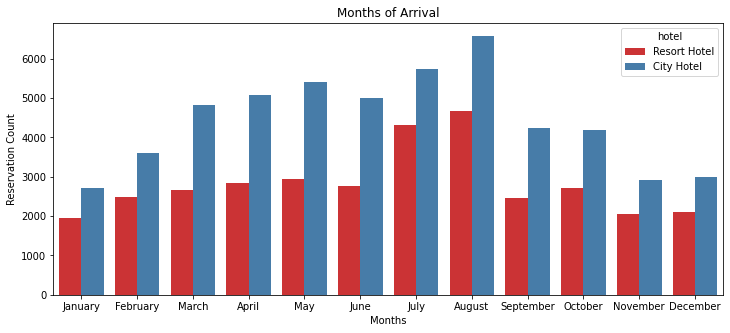

In [ ]:
print(df_hotel['arrival_date_month'].value_counts())

plt.figure(figsize=(12,5))
graph=sns.countplot(data= df_hotel, x='arrival_date_month', hue = 'hotel',order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'], palette = "Set1")
graph.set(title='Months of Arrival')
graph.set_xlabel('Months')
graph.set_ylabel('Reservation Count')

In the above graph we can see in July and August there are more number of 
bookings in both the hotels.

##### 2.4 In which year there are more number of bookings

2016    42313
2017    31633
2015    13284
Name: arrival_date_year, dtype: int64


Text(0, 0.5, 'Reservation Count')

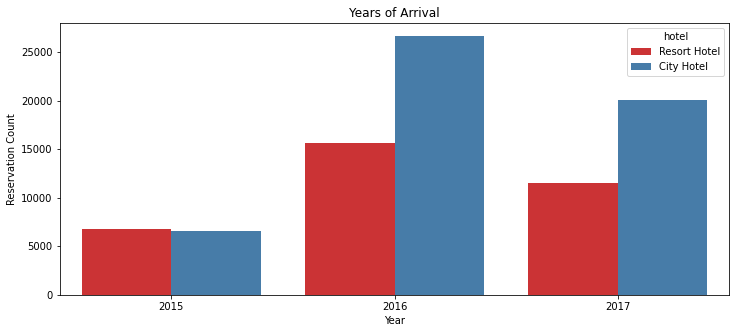

In [ ]:
print(df_hotel['arrival_date_year'].value_counts())

plt.figure(figsize=(12,5))
graph=sns.countplot(data= df_hotel, x='arrival_date_year', hue = 'hotel', palette = "Set1")
graph.set(title='Years of Arrival')
graph.set_xlabel('Year')
graph.set_ylabel('Reservation Count')


In the above graph we can see in 2016 there is more number of bookings in the both the hotels.

##### 2.5 Which meal is preferred more by customers

BB           0.778482
SC           0.107658
HB           0.104093
Undefined    0.005640
FB           0.004127
Name: meal, dtype: float64


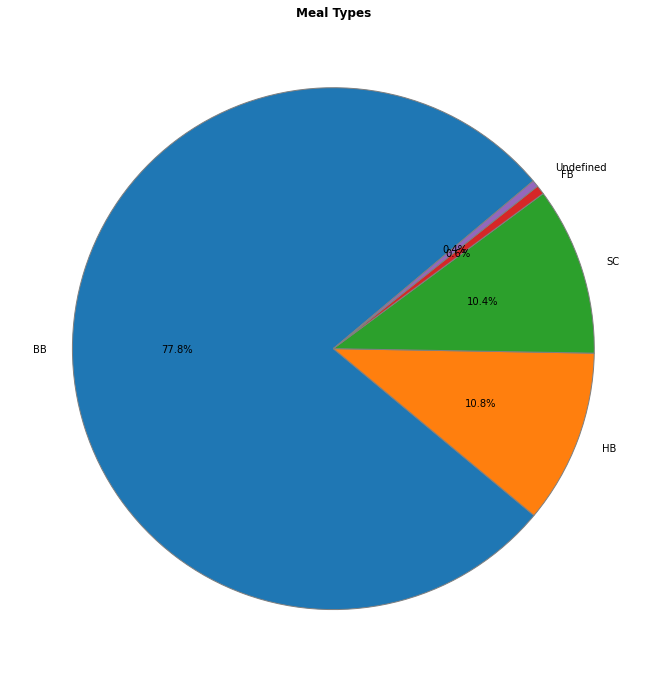

In [ ]:
meal=df_hotel.meal.value_counts(normalize=True)
print(meal)
meal_labels= ['BB','HB','SC','FB', 'Undefined']

plt.figure(figsize=(12,12))
plt.pie(meal, explode=None, labels=meal_labels,  autopct='%1.1f%%', startangle=40,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'gray' }) 
plt.title('Meal Types', weight='bold')
plt.show()

In the above Pie Chart we can see there is huge difference in meal type. BB meal is most preferred meal by the customers.

##### 2.6 From which country more guests came

  country  count
0     PRT  17573
1     GBR   8440
2     FRA   7091
3     ESP   5382
4     DEU   4332
5     IRL   2347
6     ITA   1986
7     BEL   1670
8     NLD   1560
9     USA   1412


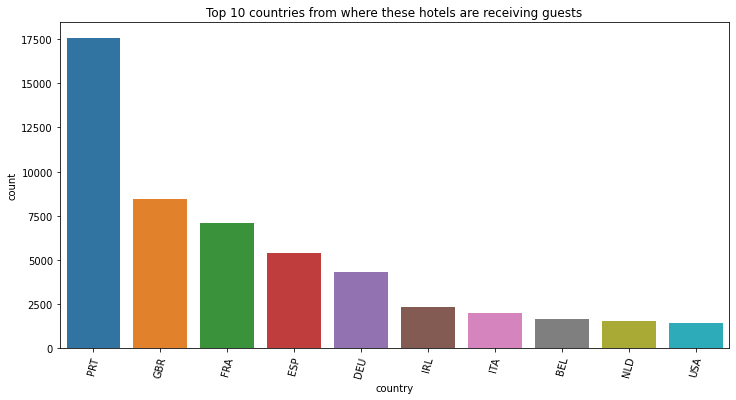

In [ ]:
country_wise_guests = df_hotel[df_hotel['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'count']
print(country_wise_guests.head(10))
top_10_countries = country_wise_guests.head(10)
top_10_countries


plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are receiving guests')
sns.barplot(x=top_10_countries.country, y=top_10_countries['count']);

country_map = px.choropleth(country_wise_guests,
                          locations=country_wise_guests['country'],
                          color=np.log(country_wise_guests['count']), 
                          hover_name=country_wise_guests['country'], 
                          hover_data=["count"],
                          color_continuous_scale=px.colors.qualitative.Antique,
                          title="Country of Guests")
country_map.show()

In the first graph plotted countries in Map . And in second graph we can see from Portugal Country more guest are came.

##### 2.7 How long does people stay

In [ ]:
df_hotel['total_nights'] = df_hotel['stays_in_weekend_nights'] + df_hotel['stays_in_week_nights']
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,03-07-2015,2


In [ ]:
stay_time = df_hotel.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay_time = stay_time.iloc[:, :3]
stay_time = stay_time.rename(columns={'is_canceled':'Number of Days'})
top_days = stay_time.head(30)
top_days

,total_nights,hotel,Number of Days
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10270
3,1,Resort Hotel,6899
4,2,City Hotel,10813
5,2,Resort Hotel,4921
6,3,City Hotel,13542
7,3,Resort Hotel,4285
8,4,City Hotel,9610
9,4,Resort Hotel,3955


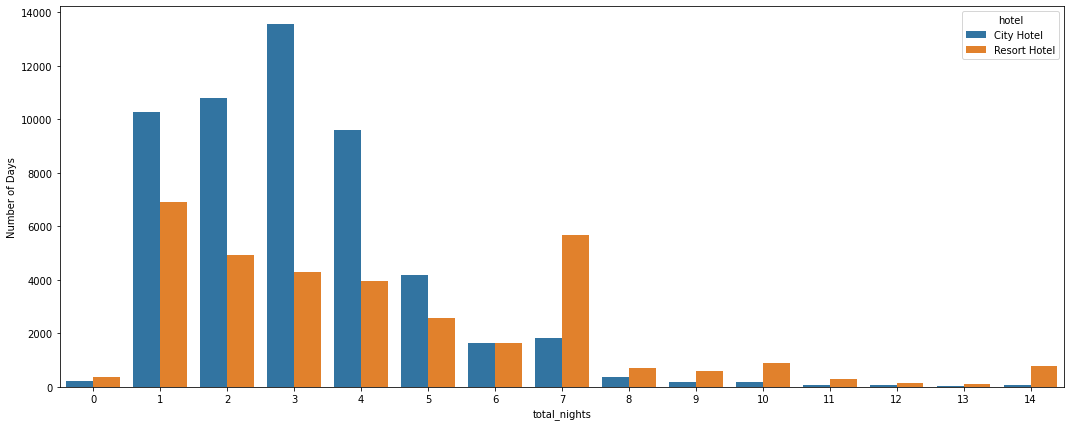

In [ ]:
plt.figure(figsize = (18,7))
# sns.lineplot(data=stay_time, x="total_nights", y="Number of Days", hue="hotel")
sns.barplot(x = 'total_nights', y = 'Number of Days',data= top_days,hue='hotel')

From the above graph we can conclude that most people stay at the hotel less than 7 days

##### 2.8 Bookings are more on Weekdays or Weekends

Total weekday nights 228885
Total weekend nights 87632


Text(0, 0.5, 'Count')

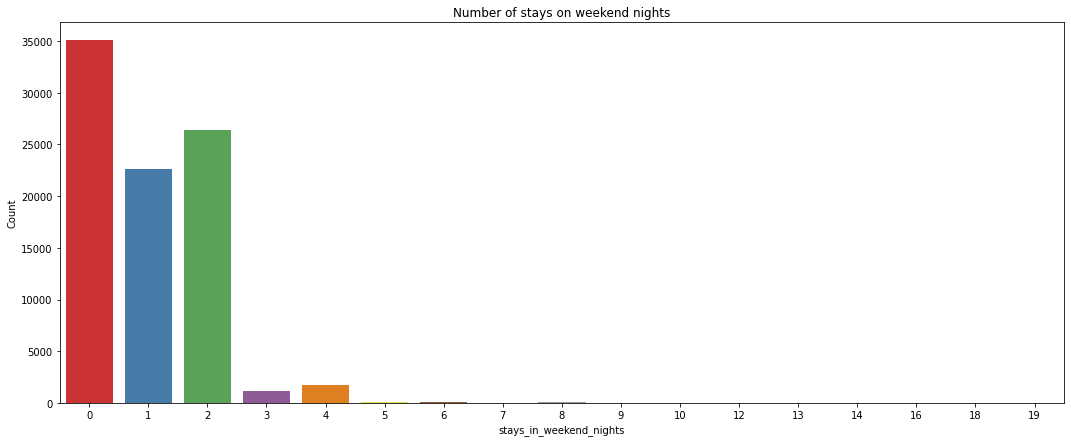

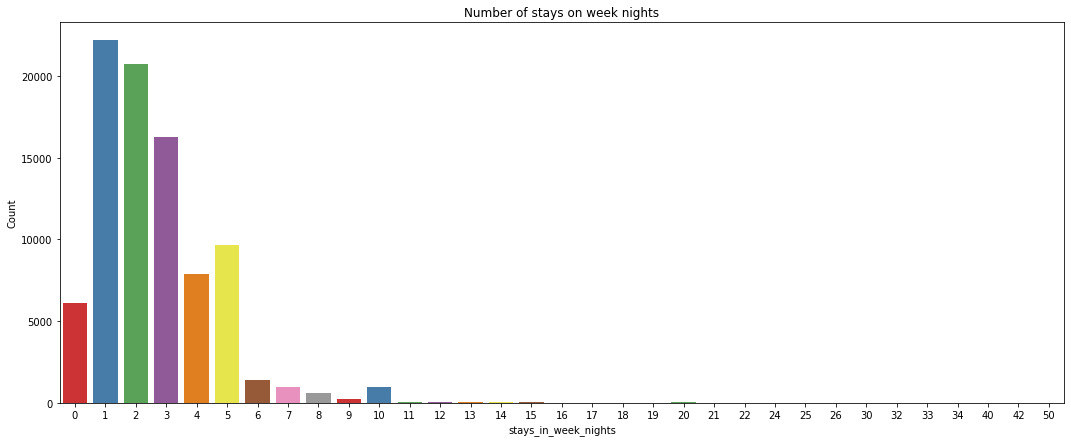

In [ ]:
weekend_nights = df_hotel['stays_in_weekend_nights'].sum()
weekday_nights = df_hotel['stays_in_week_nights'].sum()
print("Total weekday nights",weekday_nights)
print("Total weekend nights",weekend_nights)

#Plotting graph for number of weekend nights
plt.figure(figsize=(18,7))
graph=sns.countplot(data= df_hotel,x='stays_in_weekend_nights',palette = "Set1")
graph.set(title='Number of stays on weekend nights')
graph.set_xlabel('stays_in_weekend_nights')
graph.set_ylabel('Count')

#Plotting graph for number of week nights
plt.figure(figsize=(18,7))
graph=sns.countplot(data= df_hotel,x='stays_in_week_nights',palette = "Set1")
graph.set(title='Number of stays on week nights')
graph.set_xlabel('stays_in_week_nights')
graph.set_ylabel('Count')

From the above two graphs we can conclude that in week days there are more 
number of bookings as compare to weekends.

##### 2.9 How often assigned rooms are different from reserved and do having children and/or babies have any impact ?

In [ ]:
## This Function return 0 if reserved and assigned room is same else 1
def isAssgnRmDiffFromRsvdRm(item):
    if(item['reserved_room_type'] != item['assigned_room_type']):
        return 1
    else:
        return 0
## This Function return 0 if there are no children or babies else 1
def areAnyChildrenOrBabies(item):
    if(item['children'] > 0 or item['babies'] > 0):
        return 1
    else:
        return 0

## Adding new columns with status of getting different room than assigned and if any children or babies present
df_hotel['got_different_room'] = df_hotel[['reserved_room_type','assigned_room_type']].apply(isAssgnRmDiffFromRsvdRm, axis = 1)
df_hotel['any_child_or_babies'] = df_hotel[['children','babies']].apply(areAnyChildrenOrBabies, axis = 1)

## Counting how many booking got different rooms than assigned
df = df_hotel.groupby(['got_different_room'])['got_different_room'].count()
df

got_different_room
0    74240
1    12990
Name: got_different_room, dtype: int64

,got_different_room,any_child_or_babies
got_different_room,1.000000,-0.010806
any_child_or_babies,-0.010806,1.000000


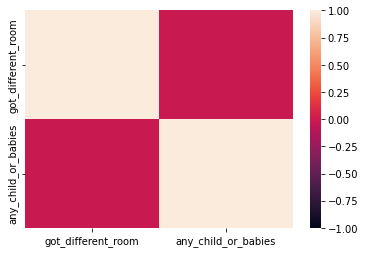

In [ ]:
## Finding correlation between getting different room and having child/babies on board
df = df_hotel[['got_different_room','any_child_or_babies']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

In [ ]:
## Calculating Percentage of booking having child/babies getting different room
df_gotDiffRoom = df_hotel[df_hotel['got_different_room'] == 1]
df = df_gotDiffRoom.groupby(['hotel']).agg({'any_child_or_babies': ['count','sum']})
df

any_child_or_babies     
                           count  sum
hotel                                
City Hotel                  5980  844
Resort Hotel                7010  409

In [ ]:
df.apply(lambda x: x.any_child_or_babies['sum'] / x.any_child_or_babies['count'], axis = 1)

hotel
City Hotel      0.141137
Resort Hotel    0.058345
dtype: float64

In [ ]:
## Calculating Percentage of booking having child/baies getting same room as reserved
df_gotSameRoom = df_hotel[df_hotel['got_different_room'] == 0]
df = df_gotSameRoom.groupby(['hotel']).agg({'any_child_or_babies': ['count','sum']})
df


any_child_or_babies      
                           count   sum
hotel                                 
City Hotel                 47294  4390
Resort Hotel               26946  3460

In [ ]:
df.apply(lambda x: x.any_child_or_babies['sum'] / x.any_child_or_babies['count'], axis = 1)

hotel
City Hotel      0.092824
Resort Hotel    0.128405
dtype: float64

It's Interesting to see that when we find correlation on between assigning different room and having children/babies is negligible but when we seggregate the data to City and Resort Hotel then we can clearly see having children/babies has low probability of getting different room in Resort hotel when compared to City Hotel.

##### 2.10 Do non repeated guests cancel more often than repeated ones ?

,is_repeated_guest,is_canceled
is_repeated_guest,1.000000,-0.088764
is_canceled,-0.088764,1.000000


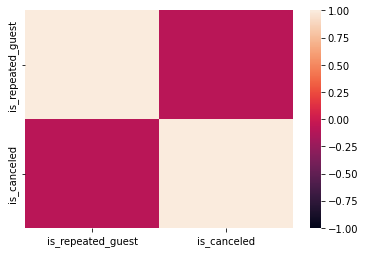

In [ ]:
## Finding correlation between cancellation status and if he is repeated guest
df = df_hotel[['is_repeated_guest','is_canceled']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

In [ ]:
## Finding Percentage of cancellation in case of repeated guest Hotel wise
df_isRepeatedUser = df_hotel[df_hotel['is_repeated_guest'] == 1]
df = df_gotDiffRoom.groupby(['hotel']).agg({'is_canceled': ['count','sum']})
df

is_canceled     
                   count  sum
hotel                        
City Hotel          5980  314
Resort Hotel        7010  302

In [ ]:
df.apply(lambda x: x.is_canceled['sum'] / x.is_canceled['count'], axis = 1)

hotel
City Hotel      0.052508
Resort Hotel    0.043081
dtype: float64

In [ ]:
## Finding Percentage of cancellation in case of 1st time guest Hotel wise
df_isNonRepeatedUser = df_hotel[df_hotel['is_repeated_guest'] == 0]
df = df_isNonRepeatedUser.groupby(['hotel']).agg({'is_canceled': ['count','sum']})
df

is_canceled       
                   count    sum
hotel                          
City Hotel         51617  15847
Resort Hotel       32249   7902

In [ ]:
df.apply(lambda x: x.is_canceled['sum'] / x.is_canceled['count'], axis = 1)

hotel
City Hotel      0.307011
Resort Hotel    0.245031
dtype: float64

We can clearly see the percentage of cancellation for Non Repeated User is higher when compared to repeated user for both City and Resort Hotels.

##### 2.11 Do customers who were on the waiting list for a long time have less cancellation compared to others ?

,lead_time,is_canceled
lead_time,1.000000,0.184515
is_canceled,0.184515,1.000000


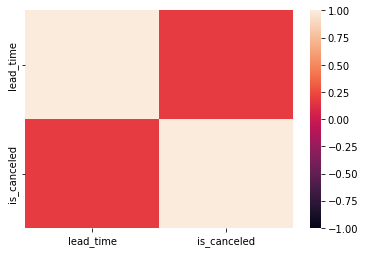

In [ ]:
## Finding correlation between lead time and cancellation status
df = df_hotel[['lead_time','is_canceled']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

In [ ]:
## Finding avg lead time in cancelled bookings hotel wise
df_isCancelled = df_hotel[df_hotel['is_canceled'] == 1]
df = df_isCancelled.groupby(['hotel']).agg({'lead_time': ['mean']})
df

,lead_time
,mean
hotel,
City Hotel,101.657499
Resort Hotel,113.944444


In [ ]:
## Finding avg lead time in not cancelled bookings hotel wise
df_isNotCancelled = df_hotel[df_hotel['is_canceled'] == 0]
df = df_isNotCancelled.groupby(['hotel']).agg({'lead_time': ['mean']})
df

,lead_time
,mean
hotel,
City Hotel,67.517388
Resort Hotel,74.009738


We can clearly see there's some positive correlation between lead_time and cancellation status i.e., the higher the lead time the more chances of cancellation and avg lead time of cancelled booking is 40 days more when compared to not cancelled bookings

##### 2.12 Do a number of special requests have any correlation with having children/babies ?

,total_of_special_requests,any_child_or_babies
total_of_special_requests,1.000000,0.094623
any_child_or_babies,0.094623,1.000000


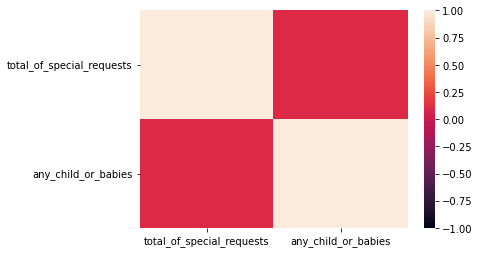

In [ ]:
## Finding correlation between number of special requests and having children/baies on board
df = df_hotel[['total_of_special_requests','any_child_or_babies']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

,total_of_special_requests,any_child_or_babies
total_of_special_requests,1.000000,0.110681
any_child_or_babies,0.110681,1.000000


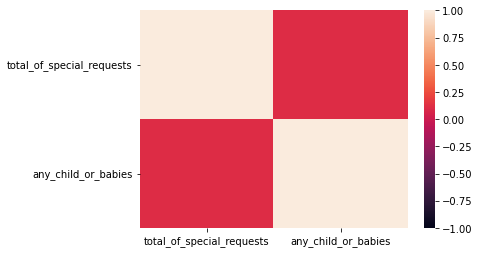

In [ ]:
## Finding correlation between number of special requests and having children/baies on board for City Hotel
df = df_hotel[df_hotel['hotel'] == 'City Hotel'][['total_of_special_requests','any_child_or_babies']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

,total_of_special_requests,any_child_or_babies
total_of_special_requests,1.000000,0.072321
any_child_or_babies,0.072321,1.000000


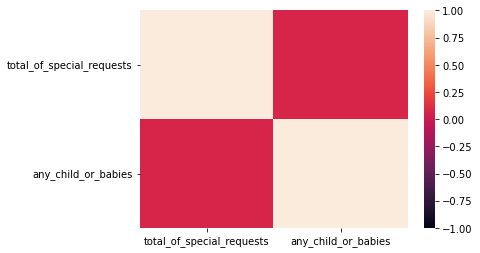

In [ ]:
## Finding correlation between number of special requests and having children/baies on board for Resort Hotel
df = df_hotel[df_hotel['hotel'] == 'Resort Hotel'][['total_of_special_requests','any_child_or_babies']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

From above comparisons we can see having children/babies have less special requests in Resort Hotel when compared to Resort hotel.

##### 2.13 Number of Booking per year for two hotels

In [ ]:
## Counting no of bookings made in each type of hotel year wise
df = df_hotel.groupby(['hotel','arrival_date_year']).size()
df

hotel         arrival_date_year
City Hotel    2015                  6526
              2016                 26684
              2017                 20064
Resort Hotel  2015                  6758
              2016                 15629
              2017                 11569
dtype: int64

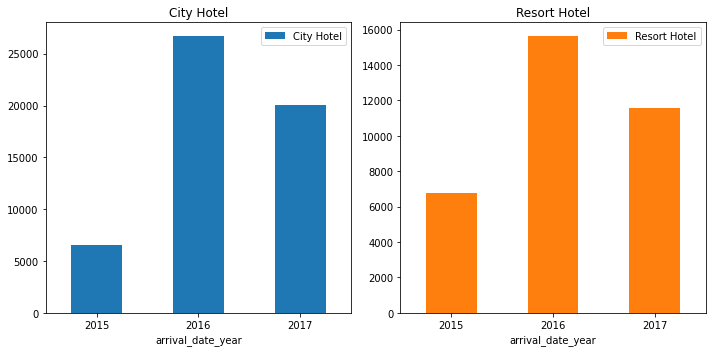

In [ ]:
## Plotting Year wise bookings for both hotels
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 5), layout=(1, 2))
plt.tight_layout()

Even though overall bookings of City Hotel is higher when compared to Resort Hotel we can observe the percent of growth in number of booking from 2015 to 2016 is much higher in City Hotel

##### 2.14 Customers distribution based on type

In [ ]:
## Counting no of bookings made by each type of customer category in each type of hotel
df = df_hotel.groupby(['hotel','customer_type']).size()
df

hotel         customer_type  
City Hotel    Contract            1467
              Group                269
              Transient          44522
              Transient-Party     7016
Resort Hotel  Contract            1668
              Group                272
              Transient          27340
              Transient-Party     4676
dtype: int64

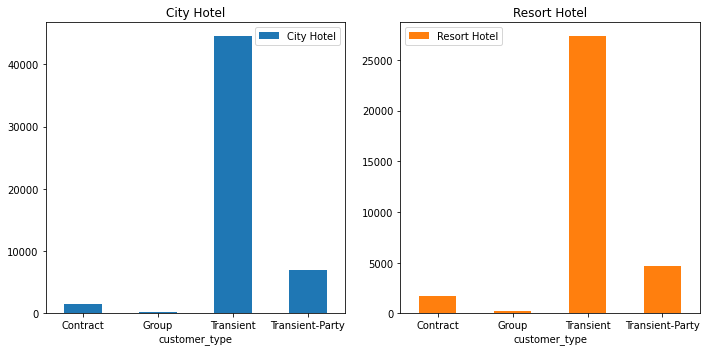

In [ ]:
## Plotting number of bookings made by each category of customer type in both hotel
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 5), layout=(1, 2))
plt.tight_layout()

Customer Type distribution has same trend in both type of Hotels, no significant difference

##### 2.15 Booking distribution based on Assigned Room Types

In [ ]:
## Counting number of bookings were assigned for each type of room in both Hotels
df = df_hotel.groupby(['hotel','assigned_room_type']).size()
df

hotel         assigned_room_type
City Hotel    A                     33377
              B                      1652
              C                       158
              D                     13197
              E                      2046
              F                      1970
              G                       689
              K                       185
Resort Hotel  A                     12906
              B                       159
              C                      2002
              D                      9222
              E                      5144
              F                      1657
              G                      1806
              H                       706
              I                       353
              L                         1
dtype: int64

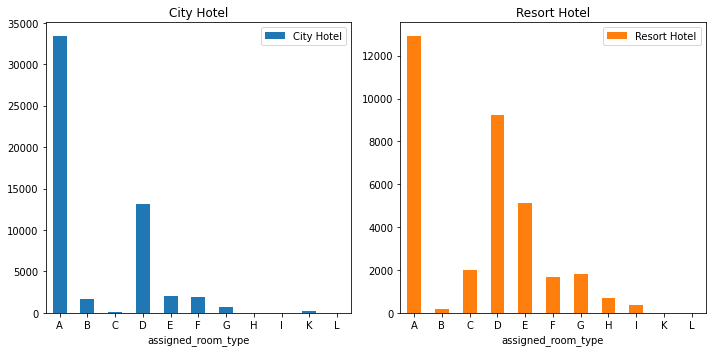

In [ ]:
## Plotting count of number of bookings for each room type in both hotels
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 5), layout=(1, 2))
plt.tight_layout()

One clear difference in assigned room type between City Hotel and Resort hotel is that B type rooms are assigned more than C type rooms in City Hotel but in Resort Hotel it is reverse

##### 2.16 Which agent made most bookings

In [ ]:
highest_bookings= df_hotel.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

# as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

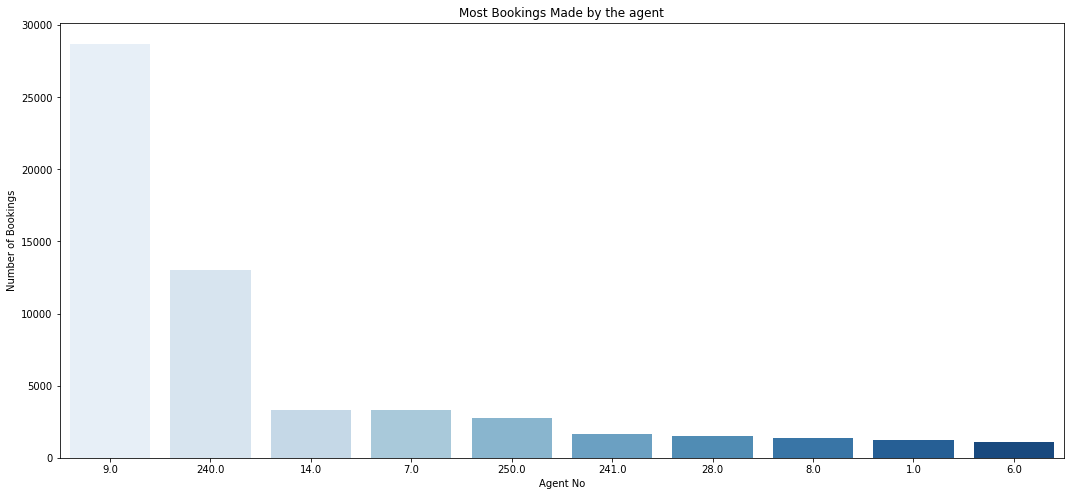

In [ ]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'],palette='Blues')
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

Observation
*   Agent ID no: 9 made most of the bookings
*   Agent ID no: 6 made the least number of bookings
*   Agent ID no: 14 and 7 have almost same number of bookings
*   Agent ID no: 28, 8 and 1 have almost same number of bookings





##### 2.17 Does a meal type have any correlation with Cancellation ?

In [ ]:
#does meal type affect cancellation?
#taking value counts for each meal type where a cancellation was made
meal_type_df=df_hotel[['meal','is_canceled']]
meal_type_df.drop(meal_type_df[meal_type_df['is_canceled'] == 0].index,inplace=True)
meal_type_df['meal'].value_counts()

BB           18043
SC            3336
HB            2449
FB              99
Undefined       82
Name: meal, dtype: int64

Text(0.5, 1.0, 'Cancellation Rate Vs meal type')

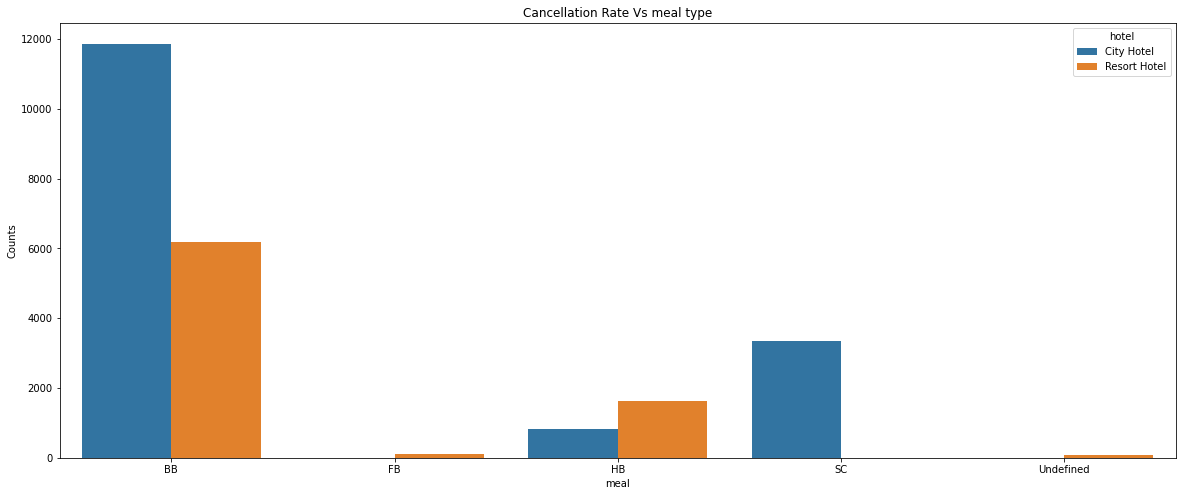

In [ ]:
#plot the graph
food_segment_df=df_hotel[df_hotel['is_canceled']==1] 
food_segment_df=food_segment_df.groupby(['meal','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by
plt.figure(figsize=(20,8))
sns.barplot(x='meal',y='counts',hue="hotel",data= food_segment_df)
# set labels
plt.xlabel('meal')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs meal type')

Observations:
*   Most cancelled bookings preferred BB
*   Most cancelled bookings are from City hotels
*   Only for HB the most number of cancellations are from resorts




##### 2.18 Which type of food is most preferred

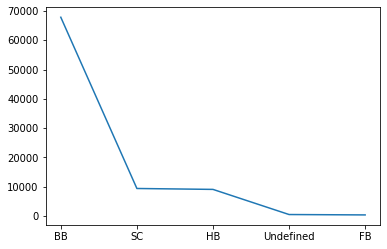

In [ ]:
plt.plot(df_hotel['meal'].value_counts())
plt.show()

Observations:
*   Most preferred meal type is BB
*   Least preferred meal type is FB



##### 2.19 Which market segment has most number of bookings?

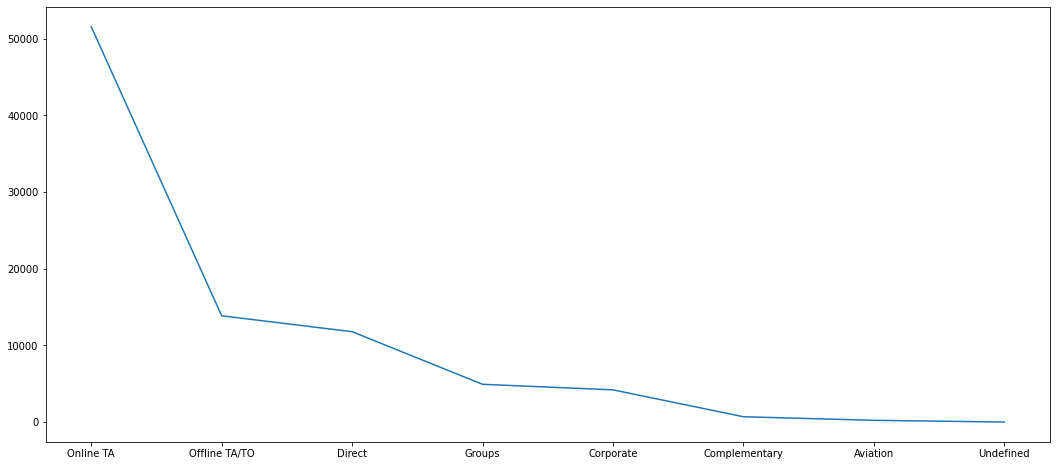

In [ ]:
#Most number of bookings among different market segments
plt.figure(figsize=(18,8))
plt.plot(df_hotel['market_segment'].value_counts())

plt.show()

Most number of bookings are through Online TA.
But it is really important to see how many people actually show up after booking through Online TA. So we next compare Cancellation rates among different market segments

##### 2.20 Which Market Segment has most Cancellation

Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

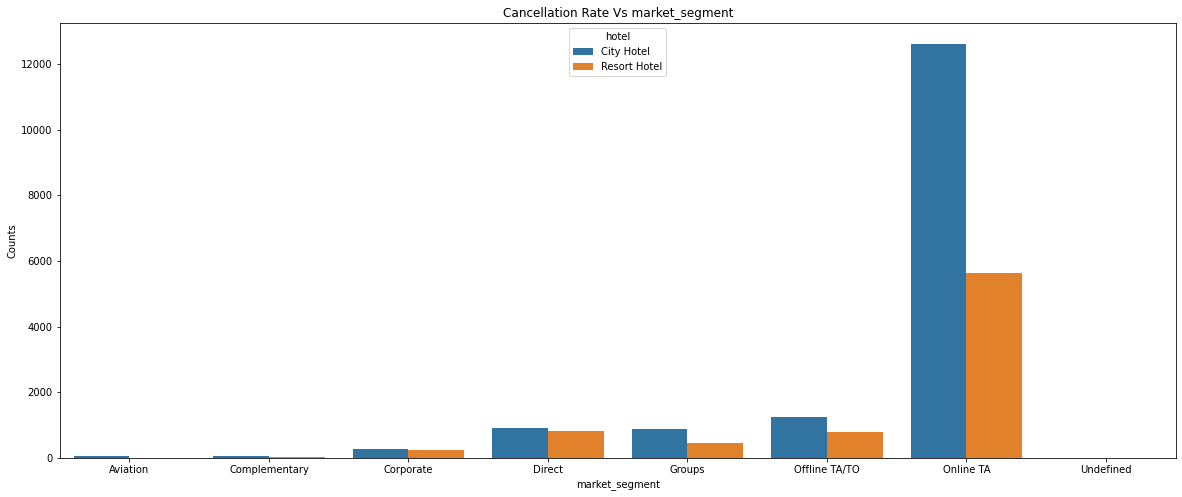

In [ ]:
#Cancellation rate in each market segment
market_segment_df=df_hotel[df_hotel['is_canceled']==1] 
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by
#set plotsize and call the barplot function
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)
# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

'Online T A' has the highest cancellation in both type of hotels.
To avoid this the hotels can give additional discounts or offers to people who book through Online TA's.

##### 2.21 Which hotel has the most number of repeated guests/customers?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

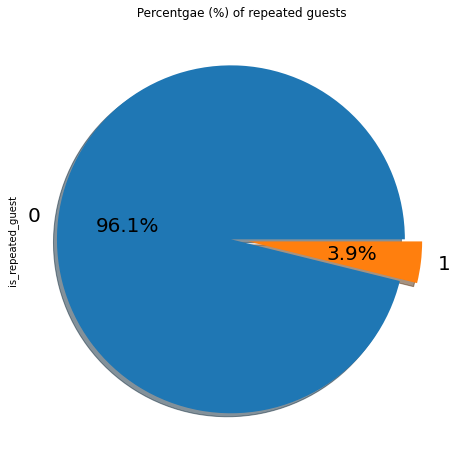

In [ ]:
#plot a pie chart to see the percentage of repeated guests
df_hotel['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)
plt.title(" Percentgae (%) of repeated guests")

Observation:
Repeated guests are very few which only 3.9 %.
In order to retain the customers,the management should take feedbacks and try improving their services.They should also keep a track of reviews from guests and try to imporve the services.

Text(0.5, 1.0, 'Most repeated guests for each hotel')

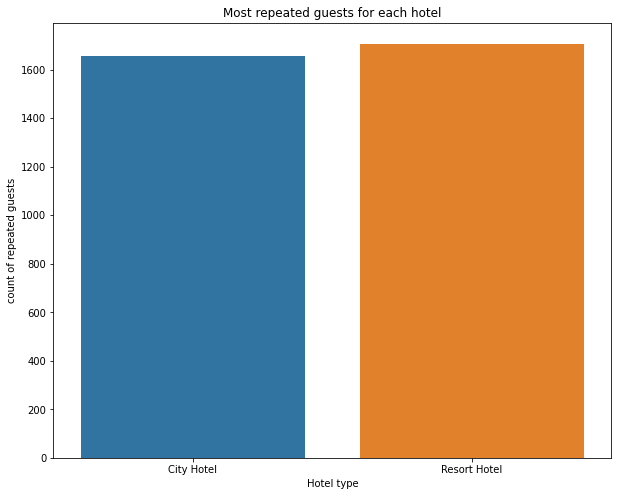

In [ ]:
#A barplot to see the repeated guests for each type of hotel 
repeated_guests_df=df_hotel[df_hotel['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})
#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

We observe that the repeated guests are almost same in both the hotels, but it is slightly higher for Resort hotel.

2.22 Correlation between deposit type and cancellation

Text(0.5, 1.0, 'Cancellation Rate Vs deposit')

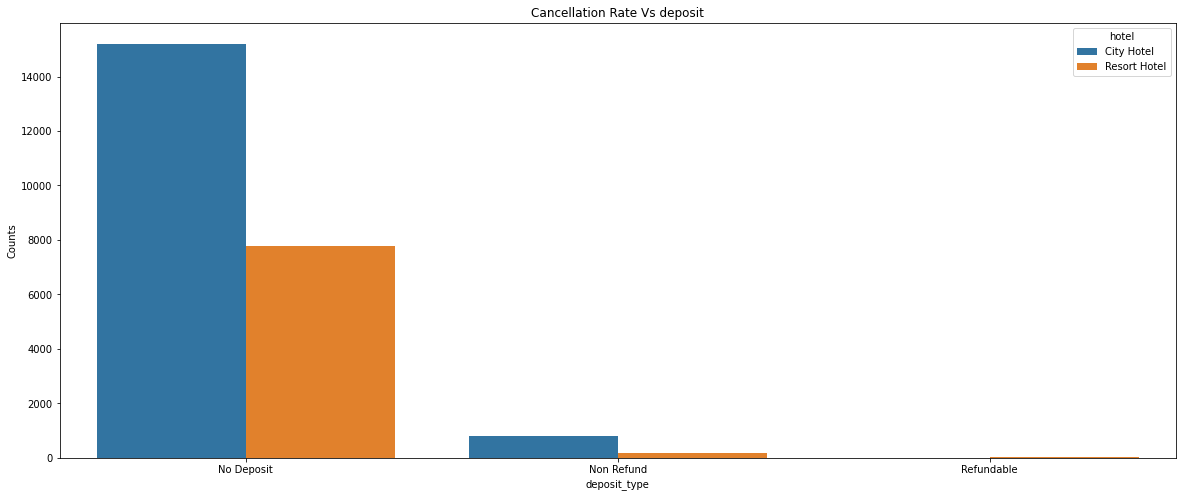

In [ ]:
#To check if the type of deposit matters when someone cancels the booking
dep_df=df_hotel[df_hotel['is_canceled']==1] 
dep_df=dep_df.groupby(['deposit_type','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by
plt.figure(figsize=(20,8))
sns.barplot(x='deposit_type',y='counts',hue="hotel",data= dep_df)
# set labels
plt.xlabel('deposit_type')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs deposit')



*   We observe that the most cancellations happen in city hotels.
*   Cancellations are more when there is no deposit, beacause there is nothing that the customer looses.
*   But the surprising fact is that the cancellations are slightly higher in non-refundable type when compared to refundable deposit





##### 2.22 Car Parking Space

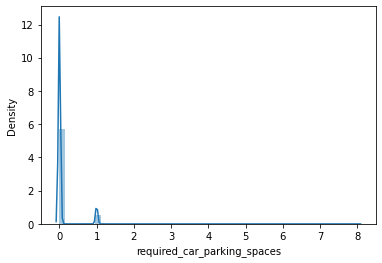

In [ ]:
sns.distplot(df_hotel.required_car_parking_spaces)
plt.show()

We notice that most of the records require no or atmost 1 car parking spaces, though there are records that show more number of parking spaces. This could be families travelling together and larger business trips.

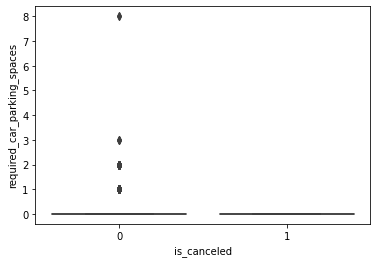

In [ ]:
sns.boxplot(x='is_canceled',y='required_car_parking_spaces',data=df_hotel)
plt.show()

We see that non-cancelled bookings required more number of car parking spaces compared to cancelled bookings

Conclusions:
*   City Hotel has more number of bookings.
*   Around 27.5% of bookings were cancelled.
*   In July and August there are more number of bookings in both hotels.
*   77.8% bookings have included only breakfast(BB) in meal.
*   Weekdays have more number of bookings than weekends.
*   In both types of hotels having child/baby on board has less chance of getting different room.
*   Cancellation rate is high for first time users.
*   Lead time has considerable amount of positive correlation with cancellation.
*   Having children/babies have less special requests in Resort hotel when compared to City Hotel.
*   YoY comparison results show high jump in number of bookings from 2015 to 2016 in City Hotel.
*   In City Hotel type B room assigned more than type C but in resort hotel it’s reverse.
*   Agent No. 9 has made most number of bookings on the other hand No. 6 made least number of bookings.
*   Repeated guest bookings are almost same in both hotels.
*   Cancellations are slightly higher in non refundable type of deposit.
*   Confirmed bookings require more number of parking spaces compared to cancelled bookings.















